In [45]:
import numpy as np
import scipy as sc
from scipy.interpolate import spline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, metrics
from sklearn.decomposition import PCA

In [46]:
#Bring our data into handy data frames
X = pd.read_csv("RawData/Final.csv")
gspc = pd.read_csv("^GSPC(1).csv")


In [47]:
#Compute average monthly average S&P for months where we have Goldman reports
spcol = ["0214","0514","0814","1114"]
gspccol = ["2","5","8","11"]
sp = {"0214":0,"0514":0,"0814":0,"1114":0}

for i in range(0,4):# these are the months for which we have data
    val = gspccol[i]
    gspc_by_month = gspc.where(gspc["Date"].str.startswith(val))["Close"]
    iavg =gspc_by_month.mean()
    spmonth = spcol[i]
    sp[spmonth] =  iavg
print(sp) #key values pairs for average closing S&P values for the listed months



{'0514': 1889.7671420476195, '0814': 1961.5319068571428, '0214': 1843.5800048, '1114': 2038.0026612000001}


In [48]:
y1 = X['0814price']-X['0214price']
ty1 = X['1114price']-X['0514price']
x1 = pd.DataFrame()
x1['0214-0514pchng'] = X['0514price']- X['0214price']
x1['0214-0514chng']=X['0214-0514chng']
x1['0214sp'] = sp['0214']
x1['0514sp'] = sp['0514']

tx1 = pd.DataFrame()
ty1 =  X['1114price']-X['0514price']
tx1['0514-0814pchng'] = X['0814price']- X['0514price']
tx1['0514-0814chng']=X['0514-0814chng']
tx1['0514sp'] = sp['0514']
tx1['0814sp'] = sp['0814']



['0214-0514pchng', '0214-0514chng', '0214sp', '0514sp']
[  9.35155247e-01  -8.93811046e-08  -5.66483549e-42   5.66483549e-42]
[  1.06373470e+00   1.52937601e-07   0.00000000e+00  -4.30304292e-40]
('Training data performance on price: ', 0.44265838701645333)


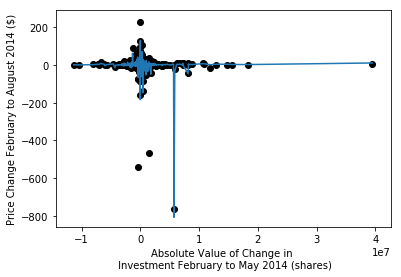

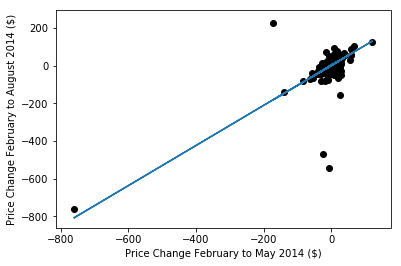

In [49]:
# Fit line using all training data
lr = linear_model.LinearRegression()
lr.fit(x1, y1)


# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x1, y1)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print(list(x1))
print(lr.coef_)
print(ransac.estimator_.coef_)


y1_pred = ransac.predict(x1)
sx1 = x1.sort_values( by = '0214-0514chng')


print("Training data performance on price: ", metrics.r2_score(y1,y1_pred))


plt.plot(sx1['0214-0514chng'], ransac.predict(sx1))
plt.scatter(x1['0214-0514chng'],y1, color = "black")
plt.ylabel("Price Change February to August 2014 ($)")
plt.xlabel("Absolute Value of Change in \n Investment February to May 2014 (shares)")
plt.show()


plt.plot(sx1['0214-0514pchng'], ransac.predict(sx1))
plt.scatter(x1['0214-0514pchng'],y1, color = "black")
plt.ylabel("Price Change February to August 2014 ($)")
plt.xlabel("Price Change February to May 2014 ($)")
plt.show()



#plt.plot(sx1['0214-0514chng'], ransac.predict(sx1))
#plt.scatter(x1['0214-0514chng'],y1, color = "black")
#plt.show()

In [50]:
#Check the performance of our training set model on test set
ty1 =  X['1114price']-X['0514price']
tx1 = pd.DataFrame()
tx1['0514-0814pchng'] = X['0814price']- X['0514price']
tx1['0514-0814chng']=X['0514-0814chng']
tx1['0514sp'] = sp['0514']
tx1['0814sp'] = sp['0814']
ty1_pred = ransac.predict(tx1)
r2 = metrics.r2_score(ty1,ty1_pred)
r2

0.57222547093754383

In [51]:
sum_r = 0
#year 2016
X2 = pd.read_csv("RawData/Final16.csv")
sp = {"0216":1896,"0516":2046,"0816":2178,"1116":2176}

#02-05
ty1 =  X2['0516price']-X2['0216price']
tx1 = pd.DataFrame()
tx1['0216-0516pchng'] = X2['0516price']- X2['0216price']
tx1['0216-0516chng']=X2['0216-0516chng']
tx1['0216sp'] = sp['0216']
tx1['0516sp'] = sp['0516']
ty1_pred = ransac.predict(tx1)
r2 = metrics.r2_score(ty1,ty1_pred)
sum_r = sum_r + r2

#05-08
ty1 =  X2['0816price']-X2['0516price']
tx1 = pd.DataFrame()
tx1['0516-0816pchng'] = X2['0816price']- X2['0516price']
tx1['0516-0816chng']=X2['0516-0816chng']
tx1['0516sp'] = sp['0516']
tx1['0816sp'] = sp['0816']
ty1_pred = ransac.predict(tx1)
r2 = metrics.r2_score(ty1,ty1_pred)
sum_r = sum_r + r2

sum_r

1.9727767163399432

In [52]:
#year 2017
X3 = pd.read_csv("RawData/Final17.csv")
sp = {"0217":2337,"0517":2400,"0817":2430,"1117":2578}

#02-05
ty1 =  X3['0517price']-X3['0217price']
tx1 = pd.DataFrame()
tx1['0217-0517pchng'] = X3['0517price']- X3['0217price']
tx1['0217-0517chng']=X3['0217-0517chng']
tx1['0217sp'] = sp['0217']
tx1['0517sp'] = sp['0517']
ty1_pred = ransac.predict(tx1)
r2 = metrics.r2_score(ty1,ty1_pred)
sum_r = sum_r + r2

#05-08
ty1 =  X3['0817price']-X3['0517price']
tx1 = pd.DataFrame()
tx1['0517-0817pchng'] = X3['0817price']- X3['0517price']
tx1['0517-0817chng']=X3['0517-0817chng']
tx1['0517sp'] = sp['0517']
tx1['0817sp'] = sp['0817']
ty1_pred = ransac.predict(tx1)
r2 = metrics.r2_score(ty1,ty1_pred)
sum_r = sum_r + r2

sum_r
avg_r = sum_r/4
avg_r

0.98868731308365965